In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pytz

In [7]:
df = pd.read_csv('../datasets/solar_p_data/df_all_vars_angles_test.csv', delimiter=',')
df['datetime_converted'] = pd.to_datetime(df['datetime_converted'], utc=True)
df = df.set_index(pd.DatetimeIndex(df['datetime_converted'],dayfirst=True))
df = df.drop(columns='datetime_converted')

In [8]:
df.head()

,Global radiation (W/m2),Diffuse radiation (W/m2),Direct solar radiation (W/m2),Value (kWh),day_of_the_year,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Precipitation intensity (mm/h),Air temperature (degC),...,Cloud_buckets_labels,Cloud_buckets,Wind_direction,Precip_buckets_labels,Precip_buckets,hour,glob_test,incidence_angle,true_solar_elev_angle,solar_elev_angle
datetime_converted,,,,,,,,,,,,,,,,,,,,,
2015-04-22 00:00:00+00:00,-2.1,-1.9,-0.2,0.0,112.0,7.0,1018.2,65.0,0.0,6.9,...,>5,"(5.0, 10.0]",WSW,0.0,"(-1.001, 0.0]",0,-16.129272,146.194050,-16.129272,-16.058955
2015-04-22 01:00:00+00:00,-3.1,-2.1,-1.0,0.0,112.0,1.0,1017.9,71.0,0.0,5.8,...,<=5,"(-0.001, 5.0]",WSW,0.0,"(-1.001, 0.0]",1,-12.646159,135.694026,-12.646159,-12.546045
2015-04-22 02:00:00+00:00,-2.6,-1.8,-0.8,0.0,112.0,3.0,1017.5,76.0,0.0,4.9,...,<=5,"(-0.001, 5.0]",W,0.0,"(-1.001, 0.0]",2,-7.747192,123.219974,-7.747192,-7.515664
2015-04-22 03:00:00+00:00,80.0,7.6,72.4,6.0,112.0,5.0,1017.3,77.0,0.0,4.9,...,<=5,"(-0.001, 5.0]",W,0.0,"(-1.001, 0.0]",3,-1.405939,109.819895,-1.405939,-1.331416
2015-04-22 04:00:00+00:00,242.0,46.2,195.8,15.0,112.0,0.0,1016.9,76.0,0.0,4.9,...,<=5,"(-0.001, 5.0]",WNW,0.0,"(-1.001, 0.0]",4,5.699966,95.939468,5.699966,5.631552


In [9]:
df.columns

Index(['Global radiation (W/m2)', 'Diffuse radiation (W/m2)',
       'Direct solar radiation (W/m2)', 'Value (kWh)', 'day_of_the_year',
       'Cloud amount (1/8)', 'Pressure (msl) (hPa)', 'Relative humidity (%)',
       'Precipitation intensity (mm/h)', 'Air temperature (degC)',
       'Dew-point temperature (degC)', 'Horizontal visibility (m)',
       'Wind direction (deg)', 'Wind speed (m/s)', 'Hor_vis_buckets_labels',
       'Hor_vis_buckets', 'Cloud_buckets_labels', 'Cloud_buckets',
       'Wind_direction', 'Precip_buckets_labels', 'Precip_buckets', 'hour',
       'glob_test', 'incidence_angle', 'true_solar_elev_angle',
       'solar_elev_angle'],
      dtype='object')

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [11]:
df['Hor_vis_buckets_labels']

datetime_converted
2015-04-22 00:00:00+00:00           [50k+
2015-04-22 01:00:00+00:00           [50k+
2015-04-22 02:00:00+00:00           [50k+
2015-04-22 03:00:00+00:00    [33.1-49.9k)
2015-04-22 04:00:00+00:00    [33.1-49.9k)
                                 ...     
2020-04-22 20:00:00+00:00           [50k+
2020-04-22 21:00:00+00:00           [50k+
2020-04-22 22:00:00+00:00           [50k+
2020-04-22 23:00:00+00:00           [50k+
2020-04-23 00:00:00+00:00           [50k+
Name: Hor_vis_buckets_labels, Length: 37473, dtype: object

In [12]:
df['Hor_vis_buckets']

datetime_converted
2015-04-22 00:00:00+00:00    (49999.0, 50000.0]
2015-04-22 01:00:00+00:00    (49999.0, 50000.0]
2015-04-22 02:00:00+00:00    (49999.0, 50000.0]
2015-04-22 03:00:00+00:00    (33130.0, 49999.0]
2015-04-22 04:00:00+00:00    (33130.0, 49999.0]
                                    ...        
2020-04-22 20:00:00+00:00    (49999.0, 50000.0]
2020-04-22 21:00:00+00:00    (49999.0, 50000.0]
2020-04-22 22:00:00+00:00    (49999.0, 50000.0]
2020-04-22 23:00:00+00:00    (49999.0, 50000.0]
2020-04-23 00:00:00+00:00    (49999.0, 50000.0]
Name: Hor_vis_buckets, Length: 37473, dtype: object

# Prediction part

In [13]:
# feature_cols = ['Global radiation (W/m2)', 'day_of_the_year',
#        'Cloud amount (1/8)', 'Pressure (msl) (hPa)', 'Relative humidity (%)',
#        'Precipitation intensity (mm/h)', 'Air temperature (degC)',
#        'Dew-point temperature (degC)', 'Horizontal visibility (m)',
#        'Wind direction (deg)', 'Wind speed (m/s)']

# feature_cols = ['day_of_the_year',
#        'Cloud amount (1/8)', 'Relative humidity (%)', 'Air temperature (degC)', 'Horizontal visibility (m)',
#        'Wind direction (deg)', 'Wind speed (m/s)']

# feature_cols = ['day_of_the_year', 'hour',
#        'Cloud amount (1/8)', 'Pressure (msl) (hPa)', 'Relative humidity (%)',
#        'Precipitation intensity (mm/h)', 'Air temperature (degC)',
#        'Dew-point temperature (degC)', 'Horizontal visibility (m)',
#        'Wind direction (deg)', 'Wind speed (m/s)']

target = ['Value (kWh)']
# target = ['Global radiation (W/m2)']

In [24]:
df.columns

Index(['Global radiation (W/m2)', 'Diffuse radiation (W/m2)',
       'Direct solar radiation (W/m2)', 'Value (kWh)', 'day_of_the_year',
       'Cloud amount (1/8)', 'Pressure (msl) (hPa)', 'Relative humidity (%)',
       'Precipitation intensity (mm/h)', 'Air temperature (degC)',
       'Dew-point temperature (degC)', 'Horizontal visibility (m)',
       'Wind direction (deg)', 'Wind speed (m/s)', 'Hor_vis_buckets_labels',
       'Hor_vis_buckets', 'Cloud_buckets_labels', 'Cloud_buckets',
       'Wind_direction', 'Precip_buckets_labels', 'Precip_buckets', 'hour',
       'glob_test', 'incidence_angle', 'true_solar_elev_angle',
       'solar_elev_angle', '(-0.001, 14854.0]', '(14854.0, 33130.0]',
       '(33130.0, 49999.0]', '(49999.0, 50000.0]', '(-0.001, 5.0]',
       '(5.0, 10.0]'],
      dtype='object')

In [14]:
X = df[feature_cols]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
model = RandomForestRegressor(n_estimators = 5000, max_depth=10, random_state=42,n_jobs=4)

In [16]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: '(14854.0, 33130.0]'

In [150]:
print("Fit done")
print("Feature importances: ", model.feature_importances_)

Fit done
Feature importances:  [6.72966223e-02 3.46043233e-01 3.11316382e-02 3.05748339e-03
 3.27104920e-01 2.21211329e-04 9.98636551e-02 3.14602943e-03
 1.14575563e-01 4.42820165e-03 3.13144219e-03]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

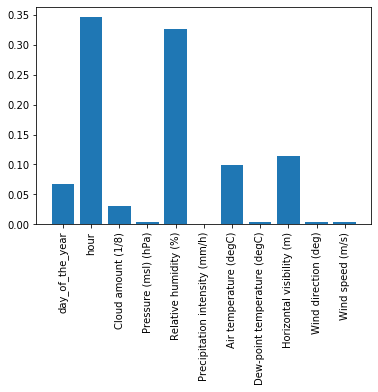

In [151]:
plt.bar(x=feature_cols,height=model.feature_importances_)
plt.xticks(rotation='vertical')

In [152]:
y_pred = model.predict(X_test)

In [153]:
y_test['y_pred'] = y_pred

C:\Users\screwdriver\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


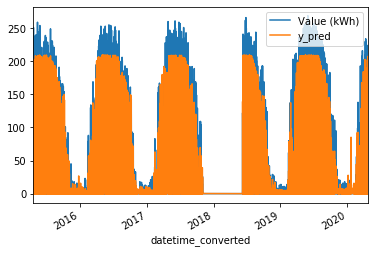

In [154]:
y_test.plot()

In [155]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test[target], y_test['y_pred'])
print("MSE - ", mse)

MSE -  372.52297848173527


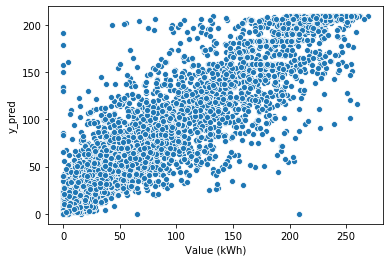

In [156]:
sns.scatterplot(x=target[0], y='y_pred', data=y_test)